### Name
Hooman Zolfaghari
### StudentId
99100036

# Librarires

In [30]:
import numpy as np
import random

from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt

# Load Dataset

In [31]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
np.random.seed(42)
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [32]:
#TODO
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        
    def fit(self, X):
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[indices]

        for _ in range(self.max_iter):
            labels = self.predict(X)

            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = np.sqrt(((X[:, np.newaxis] - self.centroids) ** 2).sum(axis=2))

        return np.argmin(distances, axis=1)
        
    def inertia(self, X):
        labels = self.predict(X)
        return np.sum((X - self.centroids[labels]) ** 2)

In [33]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_data)
labels = kmeans.predict(x_data)

# Use elbow method and silhouette method to choose optimal cluster numbers

In [34]:
#TODO


def elbow_method(X, max_clusters=10, plot = False):
    inertias = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        inertias.append(kmeans.inertia(X))
    
    if plot:
        plt.plot(range(1, max_clusters + 1), inertias, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Inertia')
        plt.show()

    delta_inertias = np.diff(inertias)

    elbow = np.argmin(delta_inertias) + 1

    return elbow

def silhouette_score(X, labels):# I could use the sklearn silhouette_score as well
    pairwise_distance = np.sqrt(((X[:, np.newaxis] - X) ** 2).sum(axis=2))

    silhouette_scores = []
    for i in range(X.shape[0]):
        same_cluster = labels == labels[i]
        a = pairwise_distance[i, same_cluster].mean()

        other_clusters = np.unique(labels[~same_cluster])
        b = np.min([pairwise_distance[i, labels == label].mean() for label in other_clusters])

        silhouette_scores.append((b - a) / max(a, b))

    return np.mean(silhouette_scores)

def silhouette_method(X, max_clusters=10, plot = False):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1): 
        kmeans = KMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        labels = kmeans.predict(X)
        silhouette_scores.append(silhouette_score(X, labels))

    if plot:
        plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Silhouette Score')
        plt.show()

    optimal_clusters = np.argmax(silhouette_scores) + 2
    return optimal_clusters



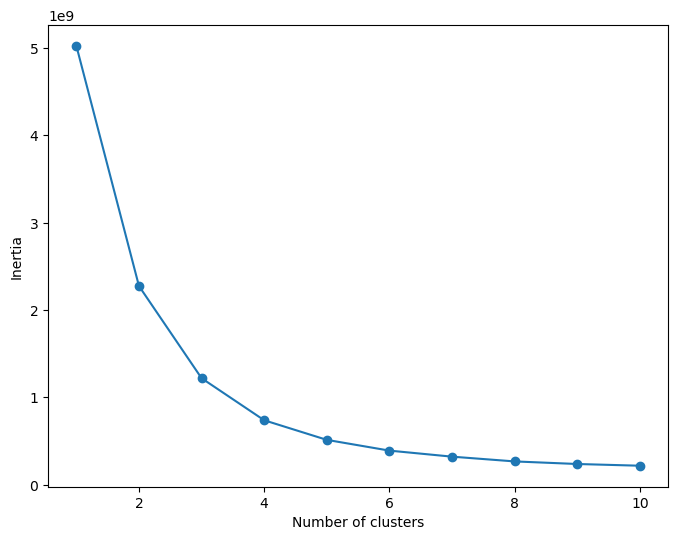

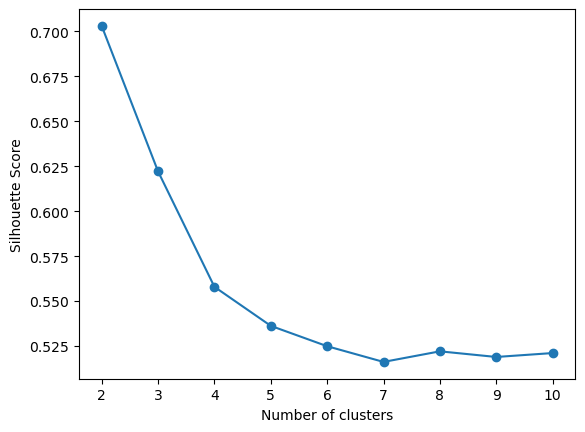

Optimal number of clusters according to the Elbow method: 1
Optimal number of clusters according to the Silhouette method: 2


In [35]:
plt.figure(figsize=(8,6))
elbow_clusters = elbow_method(x_data, max_clusters=10, plot=True)
silhouette_clusters = silhouette_method(x_data, max_clusters=10, plot= True)

print("Optimal number of clusters according to the Elbow method:", elbow_clusters)
print("Optimal number of clusters according to the Silhouette method:", silhouette_clusters)


# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

In [36]:
#TODO
from sklearn.cluster import KMeans as SKLearnKMeans
from sklearn.metrics import silhouette_score as sklearn_silhouette_score

def sklearn_elbow_method(X, max_clusters=10, plot = False):
    inertias = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = SKLearnKMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    
    if plot:
        plt.plot(range(1, max_clusters + 1), inertias, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Inertia')
        plt.show()

    delta_inertias = np.diff(inertias)

    elbow = np.argmin(delta_inertias) + 1

    return elbow

def sklearn_silhouette_method(X, max_clusters=10, plot=False):
    silhouette_scores = []
    for n_clusters in range(2, max_clusters + 1):  # silhouette_score requires at least 2 clusters
        kmeans = SKLearnKMeans(n_clusters=n_clusters)
        kmeans.fit(X)
        labels = kmeans.predict(X)
        silhouette_scores.append(sklearn_silhouette_score(X, labels))
    
    if plot:
        plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Silhouette Score')
        plt.show()

    optimal_clusters = np.argmax(silhouette_scores) + 2
    return optimal_clusters


elbow:


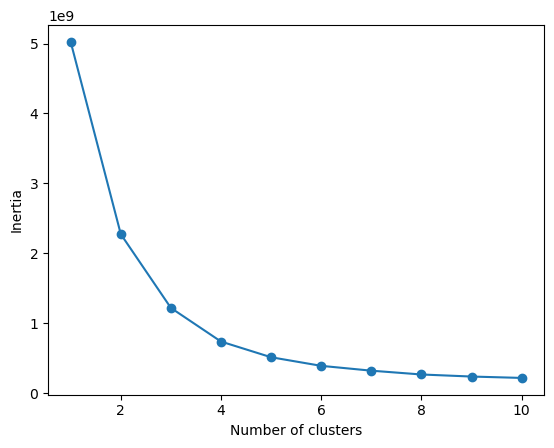

   Custom KMeans: 1


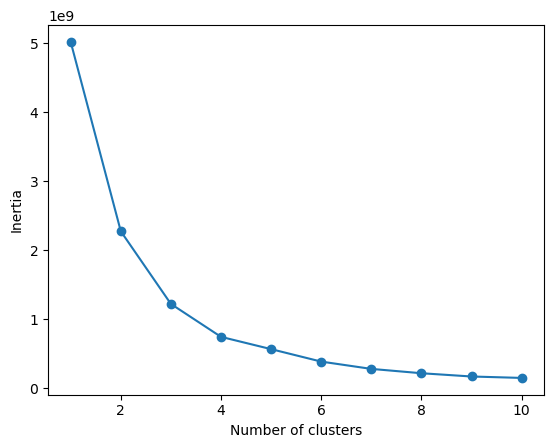

   SKLearn KMeans: 1
silhouette:


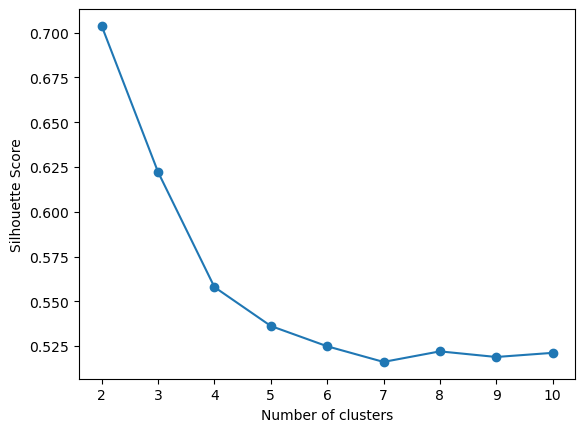

   Custom KMeans: 2


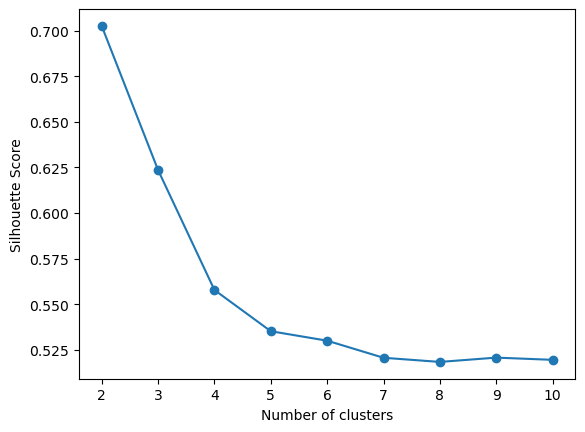

   SKLearn KMeans: 2


In [37]:
print("elbow:")
print(f"   Custom KMeans: {elbow_method(x_data, max_clusters=10, plot=True)}")
print(f"   SKLearn KMeans: {sklearn_elbow_method(x_data, max_clusters=10, plot=True)}")
print("silhouette:")
print(f"   Custom KMeans: {silhouette_method(x_data, max_clusters=10, plot=True)}")
print(f"   SKLearn KMeans: {sklearn_silhouette_method(x_data, max_clusters=10, plot=True)}")

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

ans:

the final answers of custom and sklearn are the same. for elbow they both suggest 1 and for silhouette they suggest 2. the plots are a little different which could be because of my custom silhouette_score method or some sklearn optimizations.

since k=1 doesnt really cluster anything, based on these results and the advantages of silhouette method k=2 would be the final optimal choice.

### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method

The Elbow Method aims to find the optimal number of clusters by analyzing the within-cluster sum of squares (WSS) or the total intra-cluster variation. It is suitable for quick insights when the dataset is small or time complexity matters.

The Silhouette Method evaluates the quality of clustering based on how similar data points are to their own cluster compared to other clusters.It is more precise than the Elbow Method and it considers both cohesion (within-cluster similarity) and separation (between-cluster dissimilarity).

so I prefer the Silhouette Method here because of the advantages and the better result of k=2 compared to k=1.